<a href="https://colab.research.google.com/github/Hazhar-Rahmani/Business-Analytics-2/blob/main/W25_I01_Information_based_learning_Hazhar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [79]:
# Import Data and Python Packages
import pandas as pd
import numpy as np
import pydotplus
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree, metrics
from sklearn.model_selection import train_test_split
from io import StringIO
from IPython.display import Image

In [80]:
!pip install ucimlrepo

In [81]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
credit_approval = fetch_ucirepo(id=27)

# data (as pandas dataframes)
x = credit_approval.data.features
y = credit_approval.data.targets

# metadata
print(credit_approval.metadata)

# variable information
print(credit_approval.variables)


{'uci_id': 27, 'name': 'Credit Approval', 'repository_url': 'https://archive.ics.uci.edu/dataset/27/credit+approval', 'data_url': 'https://archive.ics.uci.edu/static/public/27/data.csv', 'abstract': 'This data concerns credit card applications; good mix of attributes', 'area': 'Business', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 690, 'num_features': 15, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': [], 'target_col': ['A16'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1987, 'last_updated': 'Wed Aug 23 2023', 'dataset_doi': '10.24432/C5FS30', 'creators': ['J. R. Quinlan'], 'intro_paper': None, 'additional_info': {'summary': 'This file concerns credit card applications.  All attribute names and values have been changed to meaningless symbols to protect confidentiality of the data.\r\n  \r\nThis dataset is interesting because there is a good mix of attributes --

In [82]:
nan_index = x.isna().any(axis=1)
x = x[~nan_index]
y = y[~nan_index]

In [83]:
print(x)
print(type(x))
print(y)
print(type(y))

     A15    A14 A13 A12  A11 A10 A9    A8  A7  A6 A5 A4      A3     A2 A1
0      0  202.0   g   f    1   t  t  1.25   v   w  g  u   0.000  30.83  b
1    560   43.0   g   f    6   t  t  3.04   h   q  g  u   4.460  58.67  a
2    824  280.0   g   f    0   f  t  1.50   h   q  g  u   0.500  24.50  a
3      3  100.0   g   t    5   t  t  3.75   v   w  g  u   1.540  27.83  b
4      0  120.0   s   f    0   f  t  1.71   v   w  g  u   5.625  20.17  b
..   ...    ...  ..  ..  ...  .. ..   ...  ..  .. .. ..     ...    ... ..
685    0  260.0   g   f    0   f  f  1.25   h   e  p  y  10.085  21.08  b
686  394  200.0   g   t    2   t  f  2.00   v   c  g  u   0.750  22.67  a
687    1  200.0   g   t    1   t  f  2.00  ff  ff  p  y  13.500  25.25  a
688  750  280.0   g   f    0   f  f  0.04   v  aa  g  u   0.205  17.92  b
689    0    0.0   g   t    0   f  f  8.29   h   c  g  u   3.375  35.00  b

[653 rows x 15 columns]
<class 'pandas.core.frame.DataFrame'>
    A16
0     +
1     +
2     +
3     +
4     +
.

In [84]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for column in x.columns:
    if x[column].dtype == 'object':
        le = LabelEncoder()
        x[column] = le.fit_transform(x[column])
        label_encoders[column] = le

for column in y.columns:
    if y[column].dtype == 'object':
        le = LabelEncoder()
        y[column] = le.fit_transform(y[column])
        label_encoders[column] = le


<ipython-input-84-220da4f7eb1f>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[column] = le.fit_transform(x[column])
<ipython-input-84-220da4f7eb1f>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[column] = le.fit_transform(x[column])
<ipython-input-84-220da4f7eb1f>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

In [85]:
print(x)

     A15    A14  A13  A12  A11  A10  A9    A8  A7  A6  A5  A4      A3     A2  \
0      0  202.0    0    0    1    1   1  1.25   7  12   0   1   0.000  30.83   
1    560   43.0    0    0    6    1   1  3.04   3  10   0   1   4.460  58.67   
2    824  280.0    0    0    0    0   1  1.50   3  10   0   1   0.500  24.50   
3      3  100.0    0    1    5    1   1  3.75   7  12   0   1   1.540  27.83   
4      0  120.0    2    0    0    0   1  1.71   7  12   0   1   5.625  20.17   
..   ...    ...  ...  ...  ...  ...  ..   ...  ..  ..  ..  ..     ...    ...   
685    0  260.0    0    0    0    0   0  1.25   3   4   2   2  10.085  21.08   
686  394  200.0    0    1    2    1   0  2.00   7   1   0   1   0.750  22.67   
687    1  200.0    0    1    1    1   0  2.00   2   5   2   2  13.500  25.25   
688  750  280.0    0    0    0    0   0  0.04   7   0   0   1   0.205  17.92   
689    0    0.0    0    1    0    0   0  8.29   3   1   0   1   3.375  35.00   

     A1  
0     1  
1     0  
2     0  

In [86]:
print(y)

     A16
0      0
1      0
2      0
3      0
4      0
..   ...
685    1
686    1
687    1
688    1
689    1

[653 rows x 1 columns]


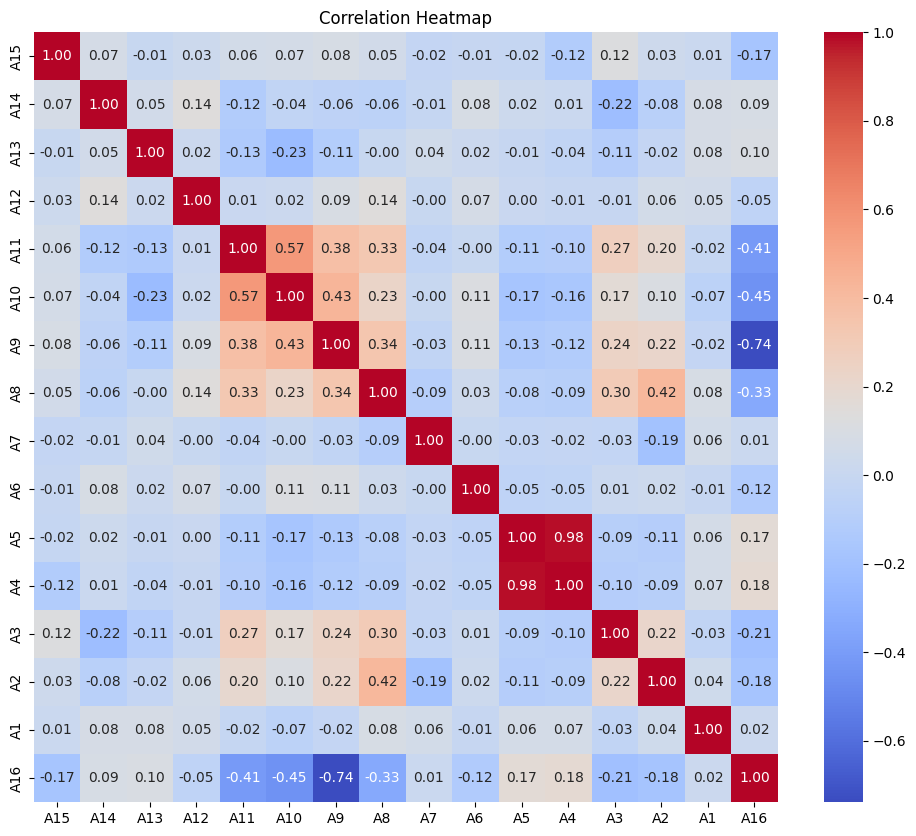

In [87]:
temp_df = pd.concat([x, y], axis=1)
corrolation = temp_df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corrolation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [88]:
rs = 45
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=rs)

In [89]:
entr_model = tree.DecisionTreeClassifier(criterion="entropy", max_depth=3, random_state=rs)
entr_model.fit(X_train, y_train)
y_pred = entr_model.predict(X_test)
y_pred = pd.Series(y_pred)
entr_model

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=45)

In [90]:
print("Model Entropy")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))
print('Precision score for "approved"' , metrics.precision_score(y_test,y_pred, pos_label = 1))
print('Precision score for "denied"' , metrics.precision_score(y_test,y_pred, pos_label = 0))
print('Recall score for "approved"' , metrics.recall_score(y_test,y_pred, pos_label = 1))
print('Recall score for "denied"' , metrics.recall_score(y_test,y_pred, pos_label = 0))

Model Entropy
Accuracy: 0.8702290076335878
Balanced accuracy: 0.8782475200755786
Precision score for "approved" 0.9516129032258065
Precision score for "denied" 0.7971014492753623
Recall score for "approved" 0.8082191780821918
Recall score for "denied" 0.9482758620689655


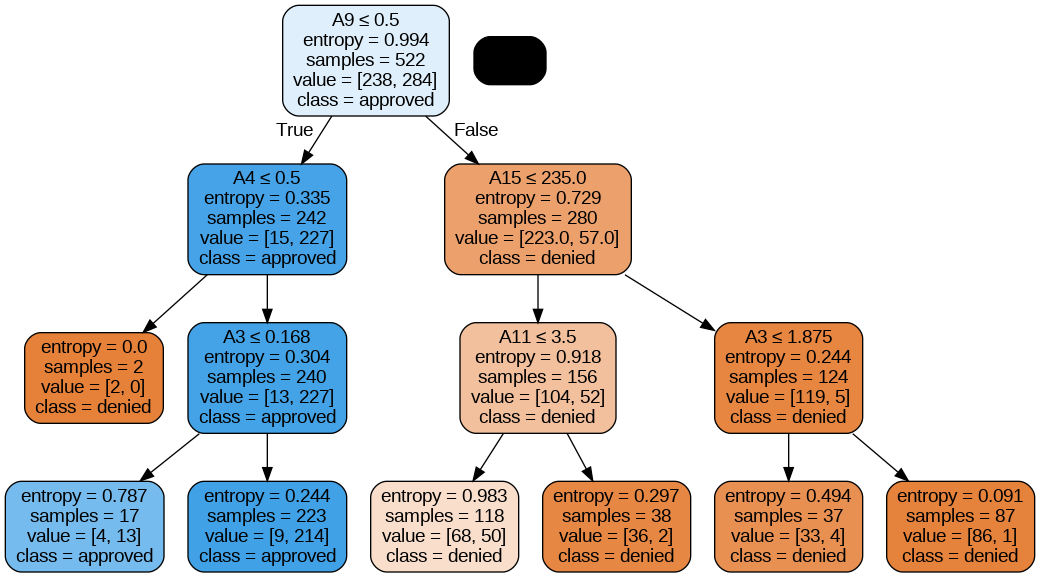

In [91]:
dot_data=StringIO()
tree.export_graphviz(entr_model, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True, feature_names=X_train.columns,
                class_names = ["denied", "approved"])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [92]:
entr_model = tree.DecisionTreeClassifier(criterion="gini", max_depth=3, random_state=rs)
entr_model.fit(X_train, y_train)
y_pred = entr_model.predict(X_test)
y_pred = pd.Series(y_pred)
entr_model

DecisionTreeClassifier(max_depth=3, random_state=45)

In [93]:
print("Model Entropy")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))
print('Precision score for "approved"' , metrics.precision_score(y_test,y_pred, pos_label = 1))
print('Precision score for "denied"' , metrics.precision_score(y_test,y_pred, pos_label = 0))
print('Recall score for "approved"' , metrics.recall_score(y_test,y_pred, pos_label = 1))
print('Recall score for "denied"' , metrics.recall_score(y_test,y_pred, pos_label = 0))

Model Entropy
Accuracy: 0.816793893129771
Balanced accuracy: 0.8072744449692961
Precision score for "approved" 0.8024691358024691
Precision score for "denied" 0.84
Recall score for "approved" 0.8904109589041096
Recall score for "denied" 0.7241379310344828


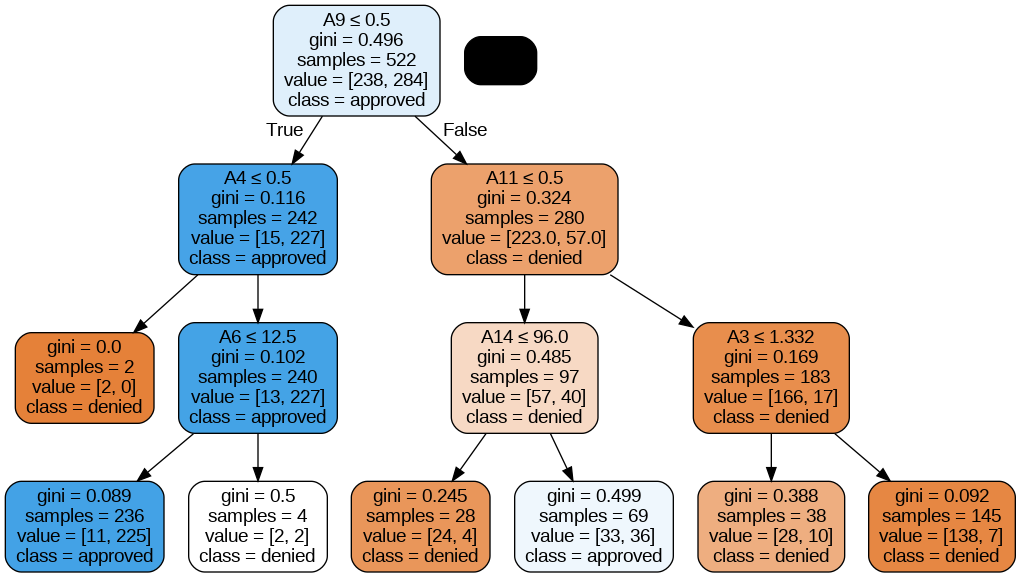

In [94]:
dot_data=StringIO()
tree.export_graphviz(entr_model, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True, feature_names=X_train.columns,
                class_names = ["denied", "approved"])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())